# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

Data can be found [here](https://github.com/sarsong/thesis/blob/main/data/ces_trees.csv)

In [2]:
data = pd.read_csv('ces_trees.csv')

In [3]:
data.columns

Index(['Tract', 'ZIP', 'Population', 'CIscore', 'CIscoreP', 'Ozone',
       'Ozone_Pctl', 'PM2_5', 'PM2_5_Pctl', 'Diesel_PM', 'Diesel_PM_Pctl',
       'Pesticides', 'Pesticides_Pctl', 'Tox_Releases', 'Tox_Releases_Pctl',
       'Traffic', 'Traffic_Pctl', 'Drinking_Water', 'DrinkingWaterPctl',
       'Lead', 'Lead_Pctl', 'Cleanups', 'Cleanups_Pctl', 'GroundwaterThreats',
       'GW_Threats_Pctl', 'Haz_Waste', 'Haz_Waste_Pctl', 'Imp_Water_Bodies',
       'ImpWaterBodPctl', 'Solid_Waste', 'Solid_Waste_Pctl', 'Pollution',
       'PollutionScore', 'Pollution_Pctl', 'Asthma', 'Asthma_Pctl',
       'Low_Birth_Weight', 'LowBirthW_Pctl', 'Cardiovascular',
       'Cardiovasc_Pctl', 'Education', 'Education_Pctl', 'Ling_Isol',
       'Ling_Isol_Pctl', 'Poverty', 'Poverty_Pctl', 'Unemployment',
       'Unemploy_Pctl', 'HousBurd', 'HousBurd_Pctl', 'PopChar', 'PopCharScore',
       'PopCharP', 'Child_10', 'Pop_10_64', 'Elderly_65', 'Hispanic', 'White',
       'African_American', 'Native_American', 'A

## Indicators of Interest

In [4]:
indicators = ['Ozone', 'PM2_5', 'Diesel_PM', 'Pesticides', 'Tox_Releases', 'Traffic',
              'Drinking_Water','Lead', 'Cleanups', 'GroundwaterThreats','Haz_Waste', 'Imp_Water_Bodies',
              'Solid_Waste', 'Pollution', 'Asthma', 'Low_Birth_Weight',
              'Cardiovascular', 'Education', 'Ling_Isol', 'Poverty', 'Unemployment', 'HousBurd',
              'Child_10', 'Pop_10_64', 'Elderly_65', 'Hispanic', 'White',
              'African_American', 'Native_American', 'Asian_American', 'Pacific_Islander', 'Other_Multiple', 'percent_tree']

In [5]:
data = data[indicators]

## Correlation Analysis

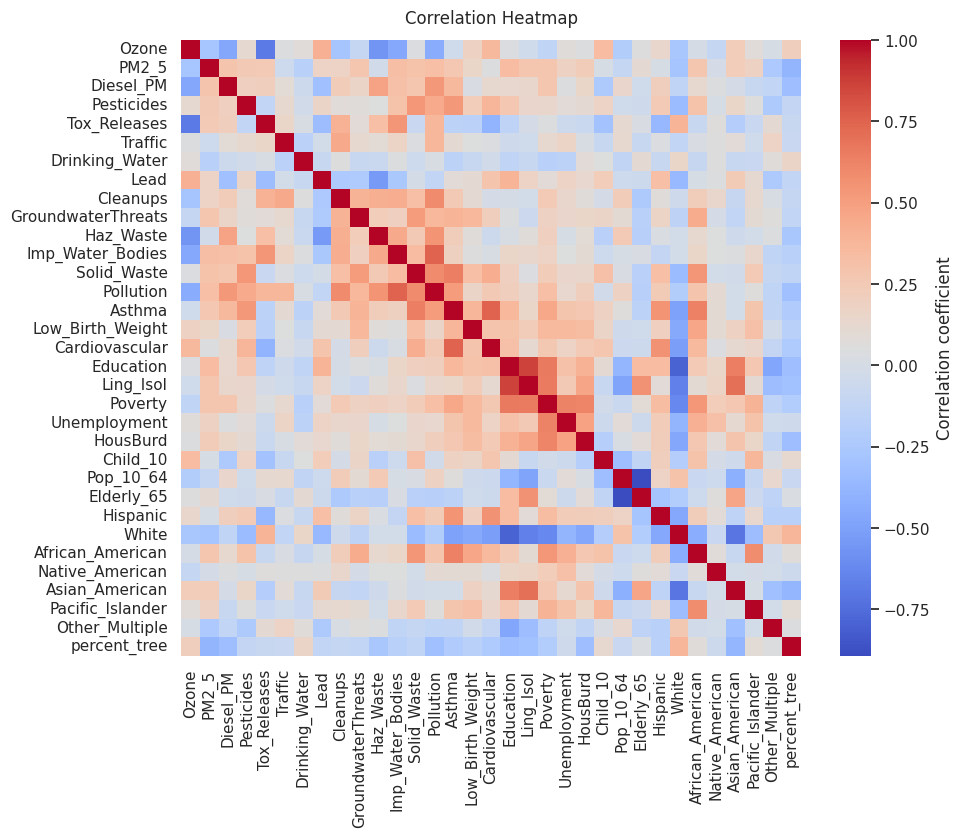

In [6]:
# calculate the correlation matrix
corr = data.corr()

# create a heatmap
sns.set_theme(style="white")  # for a nicer background style
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr, cmap="coolwarm",
                      cbar_kws={'label': 'Correlation coefficient'})
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

<ipython-input-7-98505d020576>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.values, y=target_corr.index, palette=colors)


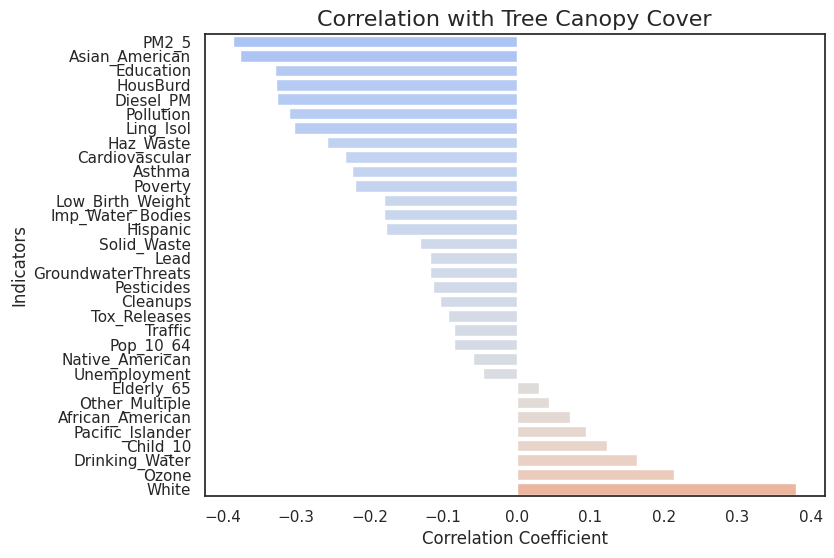

In [7]:
target_corr = corr['percent_tree']

plt.figure(figsize=(8, 6))
target_corr = target_corr.drop('percent_tree').sort_values()
colors = [plt.cm.coolwarm(x) for x in 0.5 * (target_corr.values + 1)]  # Mapping -1,1 to 0,1
sns.barplot(x=target_corr.values, y=target_corr.index, palette=colors)
plt.title('Correlation with Tree Canopy Cover', fontsize=16)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Indicators')
plt.xticks(ticks=np.linspace(-0.4, 0.4, 9))
plt.show();

In [8]:
target_corr[target_corr < -0.25]

PM2_5            -0.386241
Asian_American   -0.376496
Education        -0.329428
HousBurd         -0.327328
Diesel_PM        -0.326426
Pollution        -0.310348
Ling_Isol        -0.303476
Haz_Waste        -0.257627
Name: percent_tree, dtype: float64

In [9]:
target_corr[target_corr > 0.25]

White    0.380697
Name: percent_tree, dtype: float64

In [10]:
len(target_corr)

32

# Tree Canopy Cover and Demographics

## Tree Canopy Cover

Median: 7.8
Average: 9.7
25th Percentile 4.6
75th Percentile 12.7


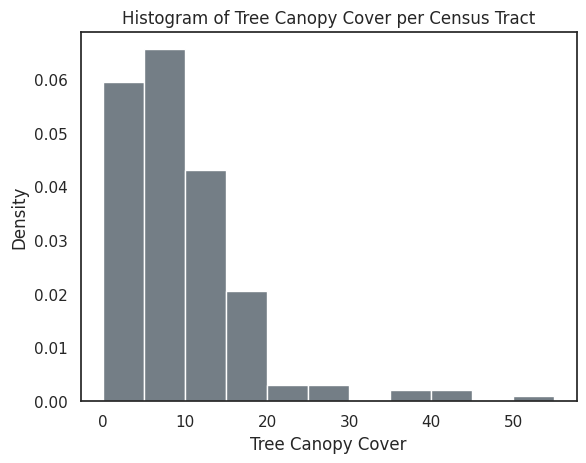

In [12]:
sns.histplot(data.percent_tree, stat='density', bins=np.arange(0,60,5), color='#46535E')
plt.title('Histogram of Tree Canopy Cover per Census Tract');
plt.xlabel('Tree Canopy Cover');
print('Median:', np.round(np.median(data.percent_tree), 1))
print('Average:', np.round(np.mean(data.percent_tree), 1))
print('25th Percentile', np.round(np.percentile(data.percent_tree, 25), 1))
print('75th Percentile', np.round(np.percentile(data.percent_tree, 75), 1))

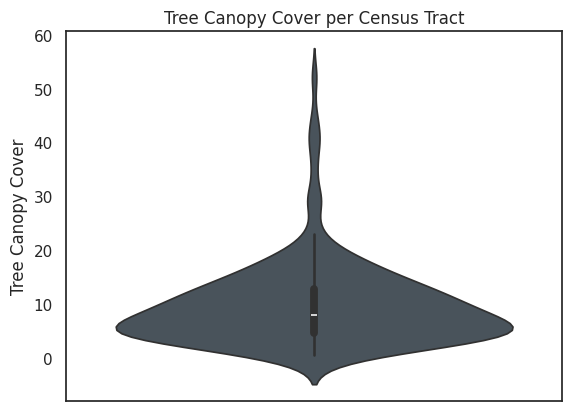

In [14]:
sns.violinplot(data.percent_tree,color='#46535E');
plt.title('Tree Canopy Cover per Census Tract')
plt.ylabel('Tree Canopy Cover');

## White Population

In [15]:
data['majority_white'] = data['White'] > 50
data['majority_white'] = data['majority_white'].replace({True: 'Yes', False: 'No'})

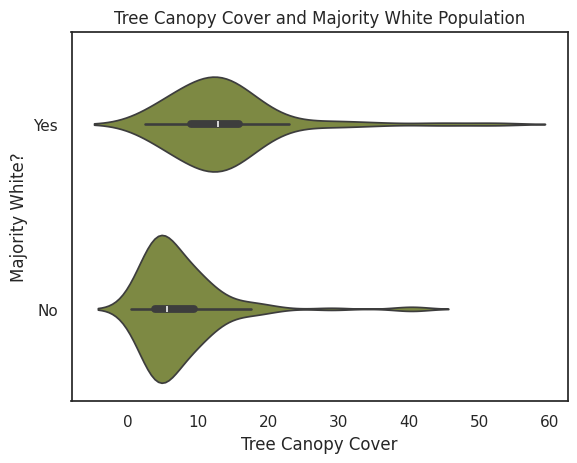

In [17]:
sns.violinplot(data=data, x='percent_tree', y="majority_white", color='#859438');
plt.title('Tree Canopy Cover and Majority White Population');
plt.ylabel('Majority White?');
plt.xlabel('Tree Canopy Cover');

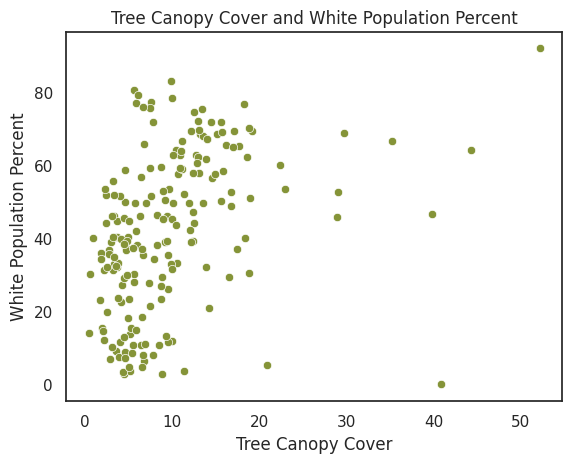

In [18]:
sns.scatterplot(data=data, x='percent_tree', y='White', color='#859438');
plt.title('Tree Canopy Cover and White Population Percent');
plt.xlabel('Tree Canopy Cover');
plt.ylabel('White Population Percent');

## Asian American Population

In [21]:
data['majority_asian'] = data['Asian_American'] > 50
data['majority_asian'] = data['majority_asian'].replace({True: 'Yes', False: 'No'})

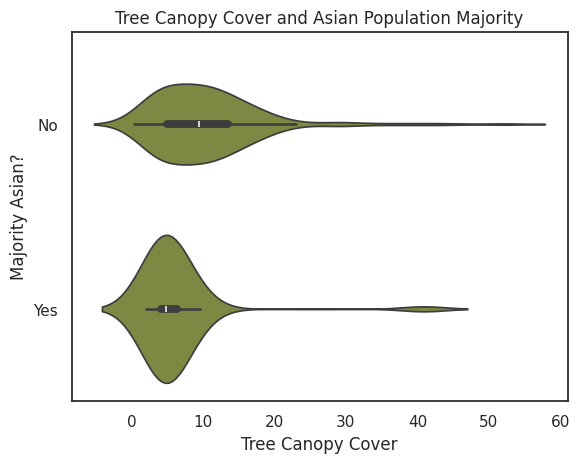

In [22]:
sns.violinplot(data=data, x='percent_tree', y="majority_asian", color='#859438');
plt.title('Tree Canopy Cover and Asian Population Majority');
plt.ylabel('Majority Asian?');
plt.xlabel('Tree Canopy Cover');

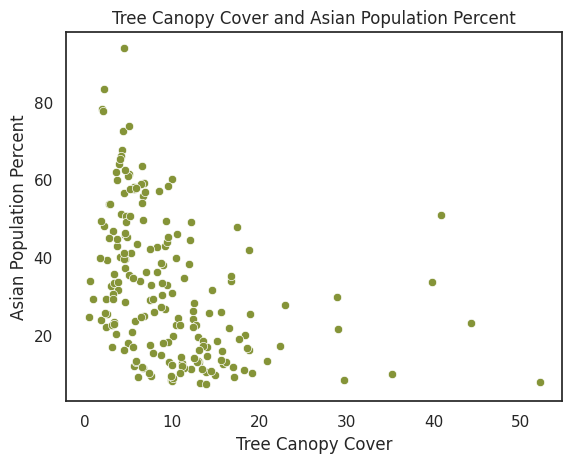

In [23]:
sns.scatterplot(data=data, x='percent_tree', y='Asian_American', color='#859438');
plt.title('Tree Canopy Cover and Asian Population Percent');
plt.xlabel('Tree Canopy Cover');
plt.ylabel('Asian Population Percent');

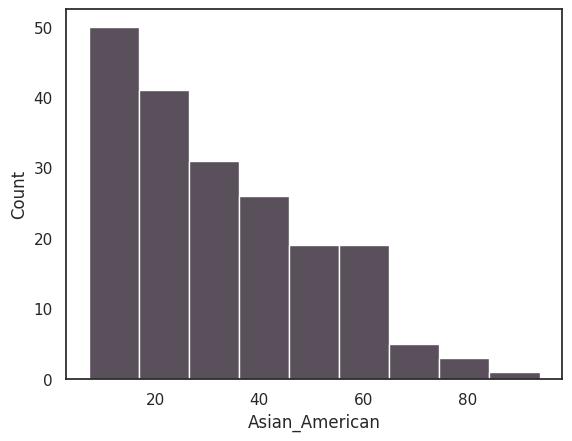

In [24]:
sns.histplot(data.Asian_American);

# Tree Canopy Cover and Environmental Factors

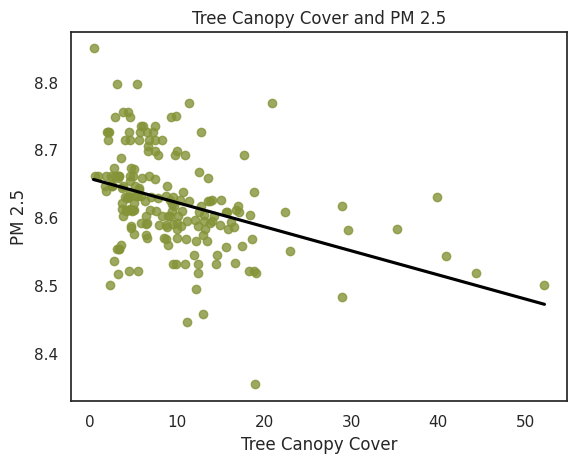

In [25]:
sns.regplot(data=data, x='percent_tree', y='PM2_5', color='#859438',
            line_kws = {"color": "black"},
            ci = 0);
plt.title('Tree Canopy Cover and PM 2.5');
plt.xlabel('Tree Canopy Cover');
plt.ylabel('PM 2.5');